# Polynomial Regression


## Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset


In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


## Training the Linear Regression model on the whole dataset


In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

## Training the Polynomial Regression model on the whole dataset


In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression()

## Visualising the Linear Regression results


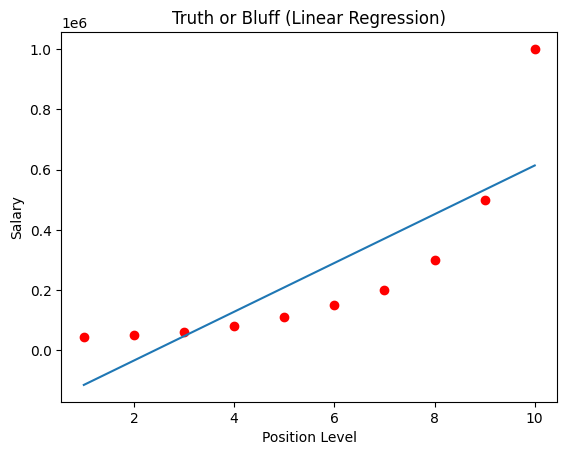

In [5]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X))
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


## Visualising the Polynomial Regression results


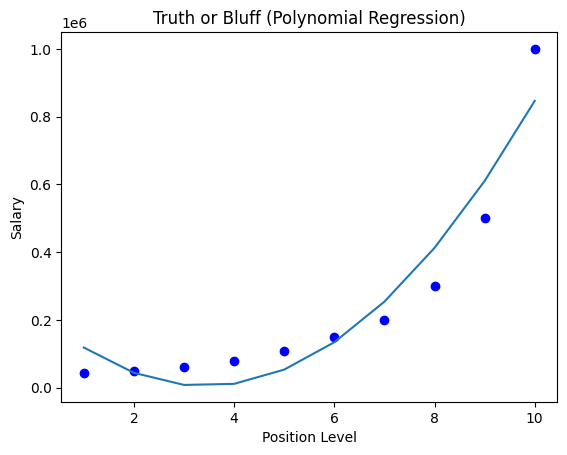

In [6]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg_2.predict(X_poly))
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


## Visualising the Polynomial Regression results (for higher resolution and smoother curve)


In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def polynomial_regressor(X, y, degree, color='red'):
    poly_reg = PolynomialFeatures(degree=4)
    X_poly = poly_reg.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    mse = mean_squared_error(y, model.predict(X_poly))
    plt.scatter(X, y, color=color)
    X_plot = np.arange(min(X), max(X), 0.1)
    X_plot = X_plot.reshape((len(X_plot), 1))
    X_plot_transform = poly_reg.fit_transform(X_plot)
    plt.plot(X_plot, model.predict(X_plot_transform))
    plt.title(f'Truth or Bluff (Polynomial Regression)(Degree={degree})')
    plt.xlabel(f'Position Level     Error = {mse}')
    plt.ylabel('Salary')
    plt.show()
    return model


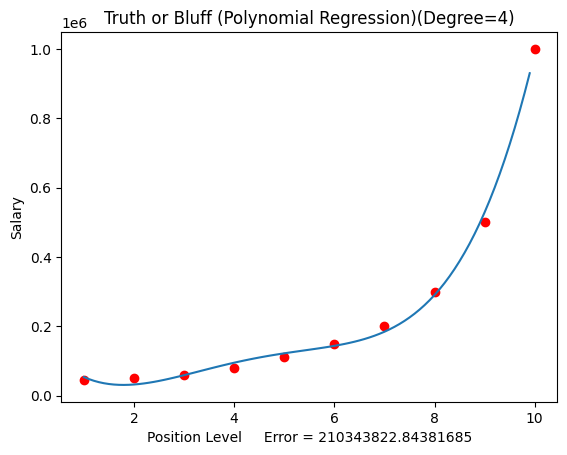

In [8]:
poly_reg_model = polynomial_regressor(X, y, 4)


## Predicting a new result with Linear Regression


In [9]:
print(
    f"Predicted salary using linear regressor = $ {round(lin_reg.predict([[6.5]])[0])}")


Predicted salary using linear regressor = $ 330379


## Predicting a new result with Polynomial Regression


In [10]:
y_test_transformed = PolynomialFeatures(degree=4).fit_transform([[6.5]])
print(
    f"Predicted salary using linear regressor = $ {round(poly_reg_model.predict(y_test_transformed)[0])}")


Predicted salary using linear regressor = $ 158862
